# pregunta 3-a
Para graficar usamos el siguiente codigo:


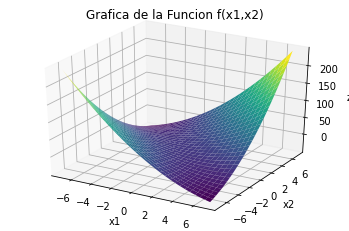

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def f(x1, x2):
    return x1**2 + 3*x1*x2 + x2**2  ##la funcion que nos piden 
x1 = np.linspace(-7, 7, 30)
x2 = np.linspace(-7, 7, 30)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
fig.canvas.set_window_title('pregunta 3-a')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
ax.set_title('Grafica de la Funcion f(x1,x2)')
plt.show()

# pregunta 3-b
Tenemos la funcion $f(x1,x2)=(x_1)^2+3x_1x2+(x_2)^2$

y queremos expresarlo de la forma $1/2(x^T)Qx$ donde Q es una matriz simetrica de orden 2x2 y $x=[x1,x2]$,entonces los coeficiente de Q seran de la forma $[[a,b],[b,c]]$

ahora operamos $1/2(x^T)Qx$:

$1/2(a(x_1)^2+2bx_1x_2+c(x_2)^2)=(x_1)^2+3x_1x_2+(x_2)^2$

con esa igualdad sale que $a=2$, $b=3$ y $c=2$

entonces la matriz Q es $[[2,3],[3,2]]$

ahora calcularemos sus valores propios:


In [ ]:
import numpy as np
mat = np.array([[2, 3],
              [3, 2]])

eigenvalue, featurevector = np.linalg.eig(mat)

print("Autovalores:", eigenvalue)
print("Vector de características:", featurevector)

if eigenvalue[0]>eigenvalue[1]:
  print("el autovalor: ",eigenvalue[0],"es el valor propio maximo")
  print("el autovalor: ",eigenvalue[1],"es el valor propio minimo")
elif eigenvalue[0]<eigenvalue[1]:
  print("el autovalor: ",eigenvalue[1],"es el valor propio maximo")
  print("el autovalor: ",eigenvalue[0],"es el valor propio minimo")
else:
  print("los autovalores ",eigenvalue[0]," y ",eigenvalue[1]," son iguales")  


Autovalores: [ 5. -1.]
Vector de características: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
el autovalor:  5.0 es el valor propio maximo
el autovalor:  -1.0000000000000009 es el valor propio minimo


# pregunta 3-c
Uno de los vectores propios asociado por el autovalor -1 es [-1,1] de acuerdo al ejercico 3-b y dandole la forma correspondiente para que sea mas sencillo su solucion.

In [ ]:
import sympy as sp
sp.init_printing(use_unicode=True)
x1, x2, a = sp.symbols('x1 x2 a', real=True)
def evaluate(func, x):
	return func.evalf(subs={x1: x[0], x2: x[1]})   ###convierte las funciones enteras en decimales
f = x1**2 + 3*x1*x2 + x2**2
gradient = sp.Matrix([f]).jacobian((x1,x2)).T
tolerance = 1e-10
j = 0
x = sp.Matrix([[-1],[1]]) ##ponemos el vector propio como punto inicial
fx = evaluate(f,x)
grad = evaluate(gradient,x)
while (grad.norm() > tolerance):
    
    # búsqueda de dirección
    d = -grad

    # línea de búsqueda
    h = x + a*d
    g = d.T*gradient.subs({x1:h[0], x2:h[1]})
    alpha = sp.nsolve(g[0], a, 0)
        
    print(f'Interaccion {j}')
    print(f'x\t\t\t\t:\t{x}')
    print(f'f(x)\t\t\t\t:\t{fx}')
    print(f'dirreccion\t\t\t:\t{d}')
    print(f'alpha\t\t\t\t:\t{alpha}\n')
    print()

    # Actualizando
    x = x + alpha*d
    j += 1
    fx = evaluate(f,x)
    grad = evaluate(gradient,x)

print(f'x\t\t\t\t:\t{x}')
print(f'f(x)\t\t\t\t:\t{fx}') 

Interaccion 0
x				:	Matrix([[-1], [1]])
f(x)				:	-1.00000000000000
dirreccion			:	Matrix([[-1.00000000000000], [1.00000000000000]])
alpha				:	-1.00000000000000


x				:	Matrix([[0], [0]])
f(x)				:	0


# pregunta 3-d

Usando el algortimo genetico nos da el punto (0,0) a la primera interaccion, esto se debe a que calculamos el vector propio asociado al valor propio minimo de Q y esto hace se realice con menos interaccion, ahora vamos a analizar si este punto es un minimo local o global.

Analizando la grafica realizada en el item a, nos damos cuenta que en el punto (0,0) hay muchos puntos por debajo de este, eso es mas simple de comprobar remmplazando en la funcion $x_1=-1$y$x_2=1$ donde $f(-1,1)=-1<0=f(0,0)$ entonces concluimos que el punto (0,0) es un minimo local. 